In [1]:
import pandas as pd 
from pandas import Series, DataFrame

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.duplicated().sum()

0

In [6]:
# last two columns are very tall so I summarized its
df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Naive_Bayes_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Naive_Bayes_mon_2'},inplace=True)

In [7]:
df.drop(columns=['CLIENTNUM'], inplace= True)

In [8]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [9]:
df.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


Existing Customer VS. Attrited Customer

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

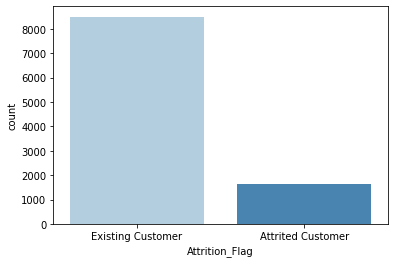

In [11]:
sns.countplot(x='Attrition_Flag', data=df, palette= 'Blues')
plt.show()

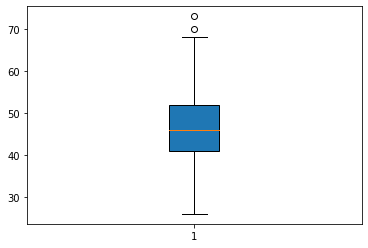

In [12]:
plt.boxplot(df['Customer_Age'], patch_artist= True)
plt.show()

Customer Gender and Marital Status

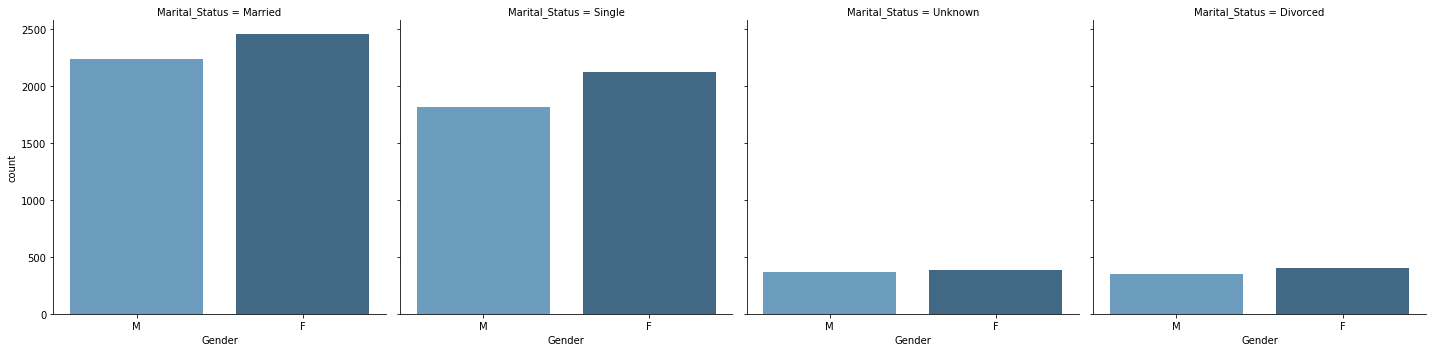

In [13]:
sns.catplot(x='Gender', data=df, palette='Blues_d', kind='count', col='Marital_Status')
plt.show()

# Customer Education Level

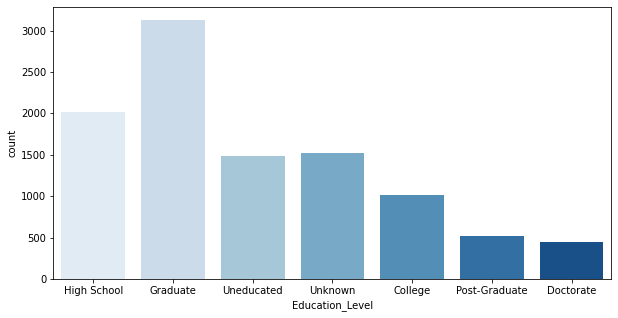

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education_Level', data=df, palette='Blues')
plt.show()

# there is a relation between (attrition or existing) customers and their income


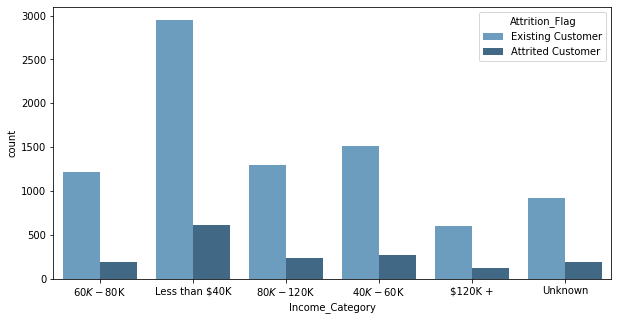

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income_Category', data=df, palette='Blues_d', hue= 'Attrition_Flag')
plt.show()

# what type of card are most used?

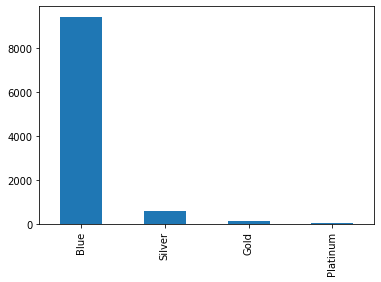

In [16]:
df.Card_Category.value_counts().plot(kind='bar')
plt.show()

# How many months that customers are spent?


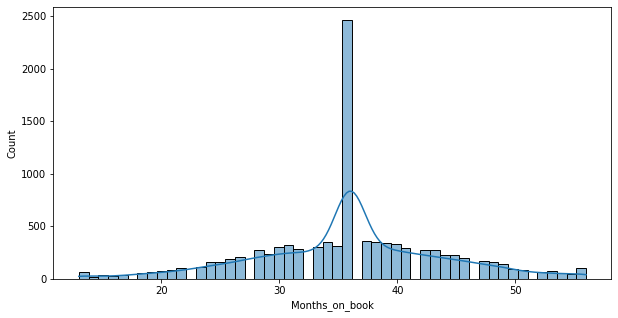

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(x='Months_on_book', data=df, kde=True)
plt.show()

# what is total relationship count?


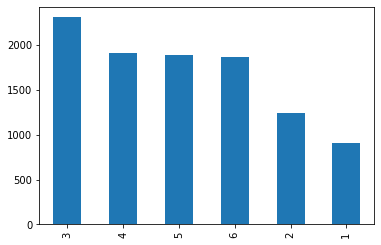

In [18]:
df.Total_Relationship_Count.value_counts().plot(kind='bar')
plt.show()

# are Total_Relationship_Count affect on Attrition_Flag?

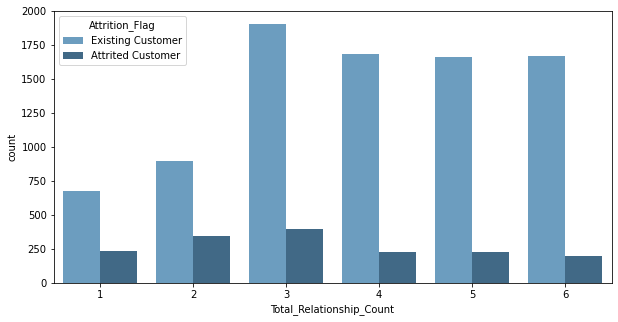

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Total_Relationship_Count',data=df,palette='Blues_d',hue='Attrition_Flag');

# Contacts_Count_12_mon VS. Months_Inactive_12_mon

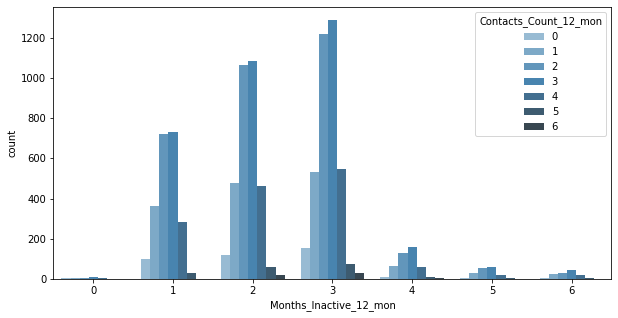

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Months_Inactive_12_mon', data=df, palette='Blues_d', hue='Contacts_Count_12_mon')
plt.show()

# distribution of credit limit of customer

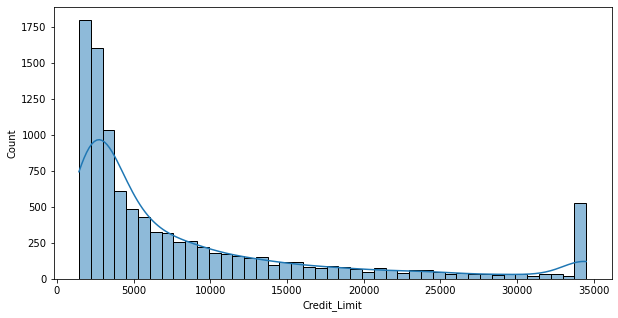

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(x='Credit_Limit', data=df, kde=True)
plt.show()

# Total amount changed from quarter 4 to quarter 1 VS. Total count changed from quarter 4 to quarter 1

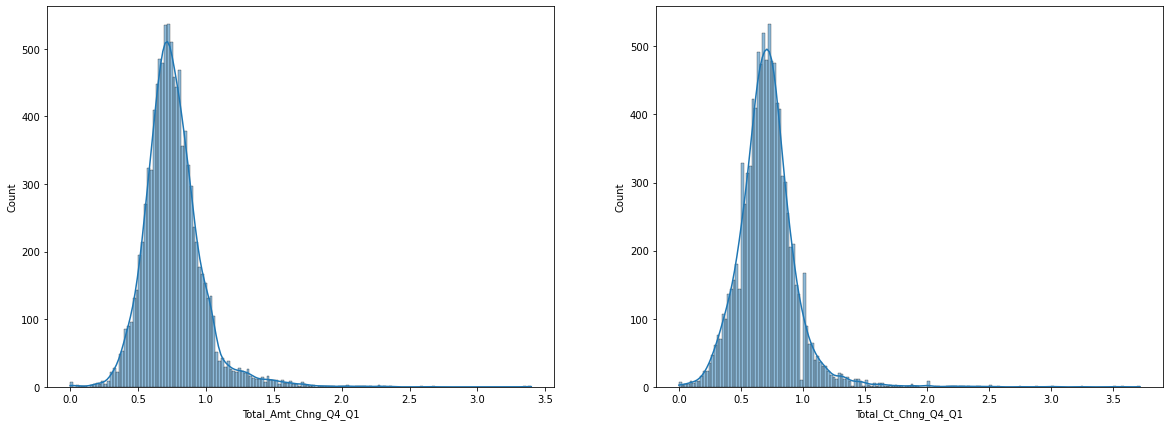

In [22]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.histplot(x='Total_Amt_Chng_Q4_Q1', data=df, kde=True, ax=ax[0])
sns.histplot(x='Total_Ct_Chng_Q4_Q1', data=df, kde=True, ax=ax[1])
plt.show()

# Total transaction amount VS. Total transaction count

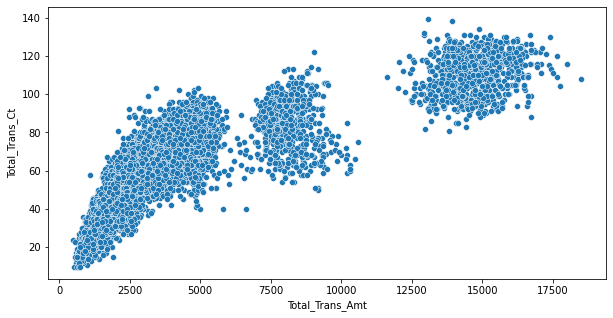

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=df);
plt.show()

# what is average utilization ratio of customer?

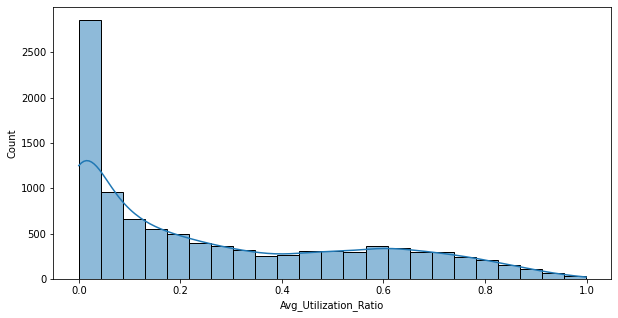

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(x='Avg_Utilization_Ratio',data=df,kde=True);
plt.show()

# correlation between columns

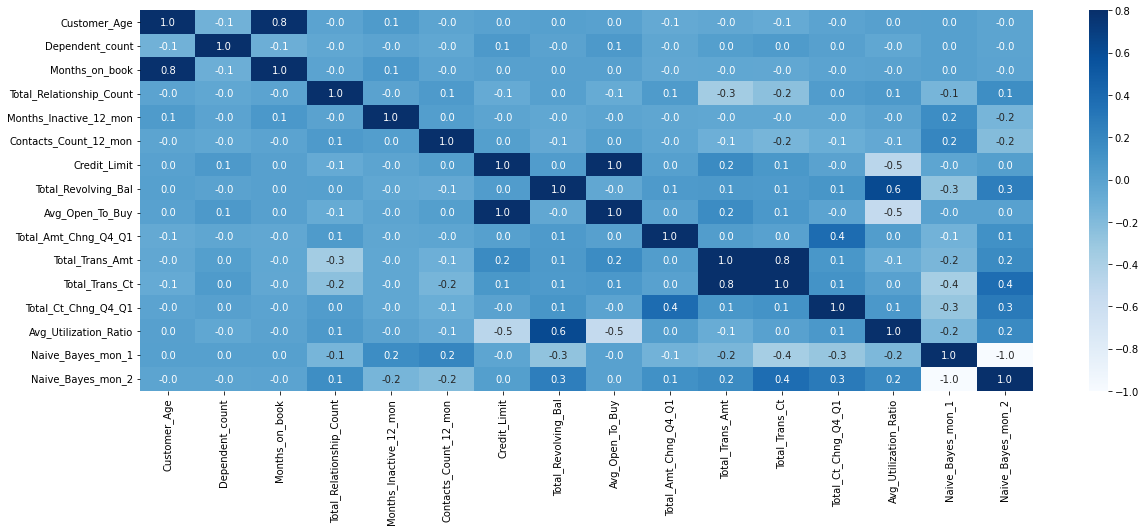

In [25]:
plt.figure(figsize=(20,7))
correlation=df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='Blues',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);
plt.show()

# Modeling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [27]:
#converting columns that have object data to numeric
lis=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
le=LabelEncoder()
for column in lis:
    df[column]=le.fit_transform(df[column])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
0,1,45,1,3,3,1,2,0,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,0,5,2,2,4,0,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,0,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,0,4,3,3,4,0,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,5,1,2,0,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [28]:
X=df.drop(columns=['Attrition_Flag'])
y=df['Attrition_Flag']
X.shape,y.shape

((10127, 21), (10127,))

In [29]:
# I will scall data because it has columns that have big and small values and it will affect on the algorithm
X=StandardScaler().fit_transform(X)
X[:3]

array([[-1.65405580e-01,  1.05995565e+00,  5.03368127e-01,
        -5.26365976e-02, -6.28127573e-01, -5.74181504e-01,
        -2.59473284e-01,  3.84620878e-01,  7.63942609e-01,
        -1.32713603e+00,  4.92403766e-01,  4.46621903e-01,
        -4.73422218e-01,  4.88970818e-01,  2.62349444e+00,
        -9.59706574e-01, -9.73895182e-01,  3.83400260e+00,
        -7.75882235e-01, -4.37753814e-01,  4.37763128e-01],
       [ 3.33570383e-01, -9.43435701e-01,  2.04319867e+00,
        -5.97678339e-01,  7.27305611e-01,  7.55052944e-01,
        -2.59473284e-01,  1.01071482e+00,  1.40730617e+00,
        -1.32713603e+00, -4.11615984e-01, -4.13666521e-02,
        -3.66666822e-01, -8.48598788e-03,  3.56329284e+00,
        -9.16432607e-01, -1.35734038e+00,  1.26085729e+01,
        -6.16275655e-01, -4.37853975e-01,  4.37845257e-01],
       [ 5.83058365e-01,  1.05995565e+00,  5.03368127e-01,
        -5.97678339e-01, -6.28127573e-01,  9.04357198e-02,
        -2.59473284e-01,  8.96451285e-03,  1.20579050e

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle =True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7088, 21), (3039, 21), (7088,), (3039,))

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [36]:
model = Sequential() # 10,1
model.add(Dense(20,activation='relu',input_shape=(21,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                440       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train,epochs=5,validation_data=(x_test,y_test)) 

Epoch 1/5
222/222 [==============================] - 2s 4ms/step - loss: 0.2820 - accuracy: 0.9074 - val_loss: 0.0509 - val_accuracy: 0.9984
Epoch 2/5
222/222 [==============================] - 1s 3ms/step - loss: 0.0190 - accuracy: 0.9997 - val_loss: 0.0073 - val_accuracy: 0.9997
Epoch 3/5
222/222 [==============================] - 1s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9997
Epoch 4/5
222/222 [==============================] - 1s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/5
222/222 [==============================] - 1s 5ms/step - loss: 8.3980e-04 - accuracy: 1.0000 - val_loss: 7.2122e-04 - val_accuracy: 1.0000


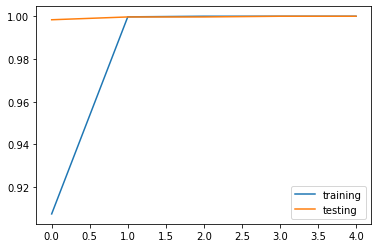

In [41]:
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='testing')
plt.legend()
plt.show()

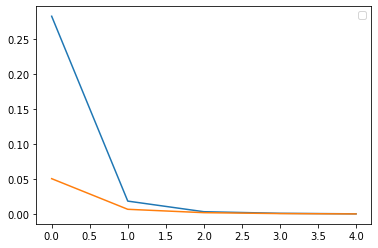

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()